## Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from tqdm import tqdm
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

## Load Preprocessed Data

In [8]:
beth_df = pd.read_csv('datasets/beth.csv')
unsw_df = pd.read_csv('datasets/unsw.csv')
cyber_df = pd.read_csv('datasets/cyber.csv')

unsw_df = unsw_df.drop(columns=["attack_cat", "target_binary", "label"])
cyber_df = cyber_df.drop(columns=["target_binary"]).select_dtypes(include=[np.number])

## Define Utility Function for KNN

In [3]:
def run_knn_experiment(data, target_column, distance_metric='minkowski', p=2):
    X = data.drop(columns=[target_column])
    y = data[target_column]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

    knn = KNeighborsClassifier(n_neighbors=5, metric=distance_metric, p=p)
    knn.fit(X_train, y_train)

    # Use kneighbors manually with tqdm
    distances, indices = knn.kneighbors(X_test)

    # Manual prediction with progress bar
    y_pred = []
    for neighbors in tqdm(indices, desc="Predicting"):
        neighbor_labels = y_train.iloc[neighbors]
        most_common = Counter(neighbor_labels).most_common(1)[0][0]
        y_pred.append(most_common)

    print(f"--- {distance_metric} (p={p}) ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"KNN Confusion Matrix ({distance_metric}, p={p})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## Run Experiments

### BETH

Predicting: 100%|████████████████████| 493380/493380 [00:12<00:00, 38924.11it/s]


--- minkowski (p=1) ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    436923
           1       1.00      0.99      1.00     54456
           2       1.00      1.00      1.00      2001

    accuracy                           1.00    493380
   macro avg       1.00      1.00      1.00    493380
weighted avg       1.00      1.00      1.00    493380

Confusion Matrix:


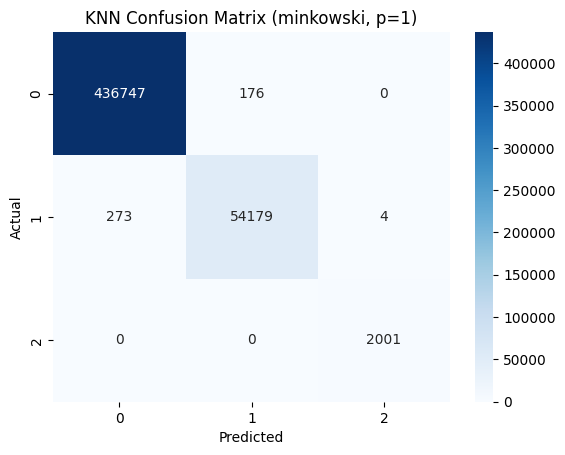

Predicting: 100%|████████████████████| 493380/493380 [00:12<00:00, 40695.13it/s]


--- minkowski (p=2) ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    436923
           1       1.00      0.99      1.00     54456
           2       1.00      1.00      1.00      2001

    accuracy                           1.00    493380
   macro avg       1.00      1.00      1.00    493380
weighted avg       1.00      1.00      1.00    493380

Confusion Matrix:


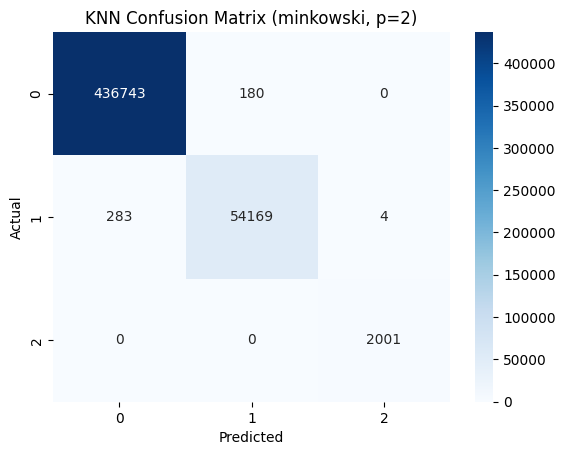

Predicting: 100%|████████████████████| 493380/493380 [00:10<00:00, 47862.06it/s]


--- cosine (p=2) ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    436923
           1       1.00      0.99      1.00     54456
           2       1.00      1.00      1.00      2001

    accuracy                           1.00    493380
   macro avg       1.00      1.00      1.00    493380
weighted avg       1.00      1.00      1.00    493380

Confusion Matrix:


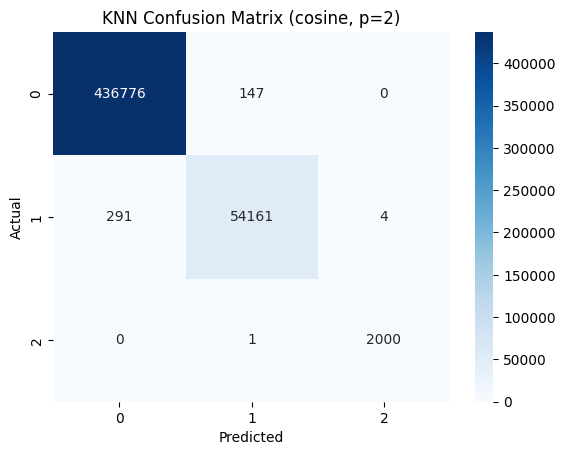

In [4]:
run_knn_experiment(beth_df, target_column='target', distance_metric='minkowski', p=1)  # Manhattan
run_knn_experiment(beth_df, target_column='target', distance_metric='minkowski', p=2)  # Euclidean
run_knn_experiment(beth_df, target_column='target', distance_metric='cosine')          # Cosine

### UNSW-NB15

Predicting: 100%|██████████████████████| 51535/51535 [00:01<00:00, 44165.46it/s]


--- minkowski (p=2) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.07      0.12       535
           1       0.16      0.04      0.06       466
           2       0.31      0.29      0.30      3271
           3       0.63      0.71      0.67      8905
           4       0.61      0.53      0.56      4849
           5       0.99      0.97      0.98     11774
           6       0.89      0.94      0.91     18600
           7       0.63      0.58      0.60      2798
           8       0.44      0.21      0.28       302
           9       0.22      0.06      0.09        35

    accuracy                           0.79     51535
   macro avg       0.52      0.44      0.46     51535
weighted avg       0.78      0.79      0.78     51535

Confusion Matrix:


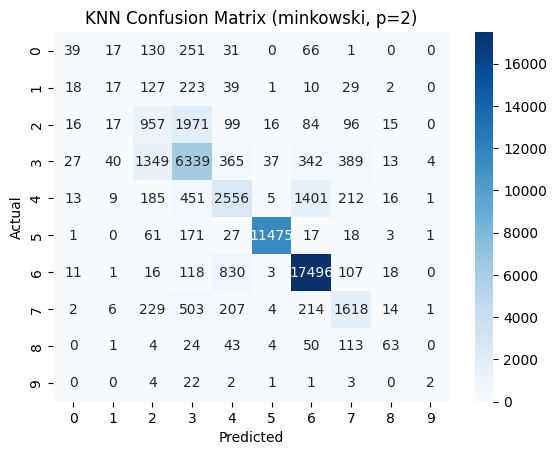

Predicting: 100%|██████████████████████| 51535/51535 [00:01<00:00, 46201.71it/s]


--- cosine (p=2) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.07      0.12       535
           1       0.15      0.03      0.06       466
           2       0.31      0.29      0.30      3271
           3       0.63      0.71      0.67      8905
           4       0.62      0.53      0.57      4849
           5       0.99      0.97      0.98     11774
           6       0.89      0.94      0.92     18600
           7       0.62      0.58      0.60      2798
           8       0.44      0.19      0.27       302
           9       0.33      0.09      0.14        35

    accuracy                           0.79     51535
   macro avg       0.53      0.44      0.46     51535
weighted avg       0.78      0.79      0.78     51535

Confusion Matrix:


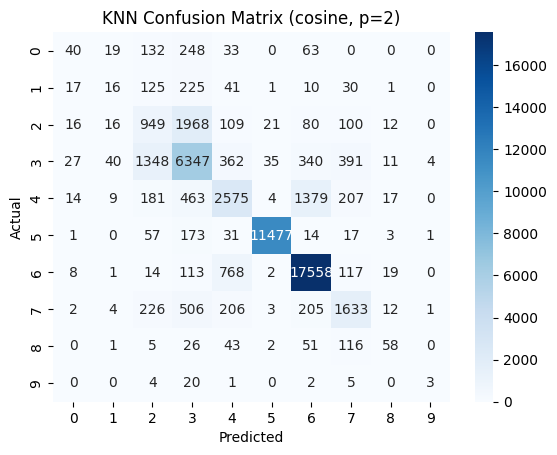

In [6]:
run_knn_experiment(unsw_df, target_column='target_multiclass', distance_metric='minkowski', p=2)
run_knn_experiment(unsw_df, target_column='target_multiclass', distance_metric='cosine')

### Attacks

Predicting: 100%|████████████████████████| 8000/8000 [00:00<00:00, 46995.20it/s]


--- minkowski (p=2) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.15      0.18      1741
           1       0.23      0.15      0.18      1783
           2       0.56      0.72      0.63      4476

    accuracy                           0.47      8000
   macro avg       0.34      0.34      0.33      8000
weighted avg       0.42      0.47      0.43      8000

Confusion Matrix:


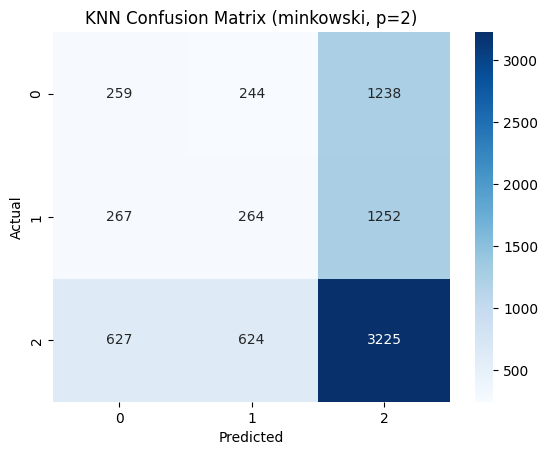

Predicting: 100%|████████████████████████| 8000/8000 [00:00<00:00, 45086.35it/s]


--- cosine (p=2) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.14      0.17      1741
           1       0.23      0.14      0.18      1783
           2       0.56      0.72      0.63      4476

    accuracy                           0.47      8000
   macro avg       0.34      0.34      0.33      8000
weighted avg       0.41      0.47      0.43      8000

Confusion Matrix:


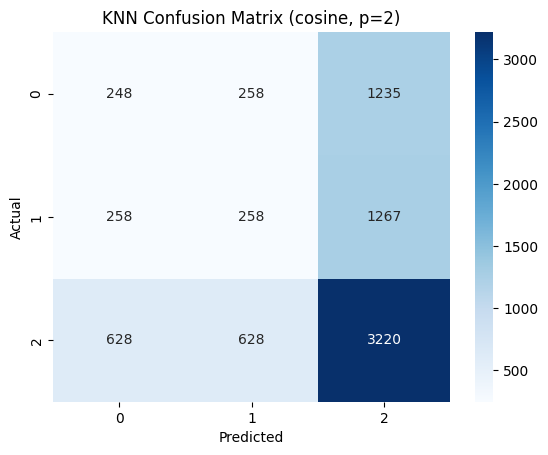

In [9]:
run_knn_experiment(cyber_df, target_column='target_multiclass', distance_metric='minkowski', p=2)
run_knn_experiment(cyber_df, target_column='target_multiclass', distance_metric='cosine')